# Tarefa 6 - Árvore de decisão e KNN com Regressão

#### **Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

---
# **Sobre o Dataset**
Contém informações demográficas e comportamentais de pacientes, juntamente com os custos individuais cobrados por seus seguros de saúde. Cada linha representa um paciente e as colunas descrevem atributos como idade (age), sexo (sex), índice de massa corporal (bmi), número de filhos ou dependentes (children), se o paciente é fumante (smoker), a região onde reside (region) e, por fim, o valor cobrado pelo plano de saúde (charges).

### **Features:**


| Coluna       | Descrição |
|--------------|-----------|
| `age`        | Idade do paciente (em anos). |
| `sex`        | Sexo do paciente (`male` para masculino, `female` para feminino). |
| `bmi`        | Índice de Massa Corporal (IMC), uma medida que relaciona peso e altura e é usada como um indicativo de obesidade. |
| `children`   | Número de filhos ou dependentes cobertos pelo plano de saúde. |
| `smoker`     | Indica se o paciente é fumante (`yes`) ou não (`no`). |
| `region`     | Região de residência do paciente dentro dos EUA (`northeast`, `southeast`, `southwest`, `northwest`). |
| `charges`    | Valor cobrado pelo seguro saúde, em dólares. Essa é a variável-alvo em muitos exercícios de regressão. |




## **Importe os pacotes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

**Dicas:**

* Certifique-se que os arquivos a serem lidos estão carregados na sua sessão do Colab, ou em um drive previamente montado, e ajuste o comando para incluir todo o caminho até cada um dos arquivos a serem lidos.

In [ ]:
df=pd.read_csv('insurance.csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Pré-Processamento dos Dados**

Aplique as técnicas de pré-processamento que vimos em aula no dataset fornecido.

### **Dicas:**
- **Converter dados categóricos para numéricos:** Use `LabelEncoder` ou `OneHotEncoder`.

- **Transformar os dados:** Experimente `MinMaxScaler` para ajustar a escala dos dados.

- **Remover outliers:** Verifique outliers com base no IQR e os elimine se necessário.

- **Tratar valores nulos:** Preencha com a média, moda, mediana ou remova as linhas, dependendo do impacto no dataset.


In [ ]:
dados_categoricos = df.select_dtypes(include=['object'])
dados_numericos = df.select_dtypes(include=['int64', 'float64'])
dados_numericos.fillna(dados_numericos.mean(), inplace=True)
Q1 = dados_numericos.quantile(0.25)
Q3 = dados_numericos.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((dados_numericos < (Q1 - 1.5 * IQR)) | (dados_numericos > (Q3 + 1.5 * IQR))).any(axis=1)
dados_numericos_no_outliers = dados_numericos[outlier_condition]
print(dados_numericos_no_outliers)

      age     bmi  children      charges
14     27  42.130         0  39611.75770
19     30  35.300         0  36837.46700
23     34  31.920         1  37701.87680
29     31  36.300         2  38711.00000
30     22  35.600         0  35585.57600
...   ...     ...       ...          ...
1301   62  30.875         3  46718.16325
1303   43  27.800         0  37829.72420
1313   19  34.700         2  36397.57600
1317   18  53.130         0   1163.46270
1323   42  40.370         2  43896.37630

[145 rows x 4 columns]


# **Criação de Conjuntos de Treinamento, Teste e Validação**

Divida os dados em conjuntos de treino, validação e teste. Para isso, selecione aleatoriamente 70% dos registros, sem reposição, para o conjunto de treinamento. Os 30% restantes deverão ser divididos igualmente entre os conjuntos de validação e teste.

Dicas:
- Fixe a semente de geração de dados aleatórios, utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

- Para fazer a divisão de treino, validação, teste use a função `train_test_split()`

In [ ]:
np.random.seed(42)


df_processed = pd.concat([dados_numericos_no_outliers, dados_categoricos], axis=1)


df_processed.dropna(inplace=True)


X = df_processed.drop('charges', axis=1)
y = df_processed['charges']


X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)



X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Conjunto Treinamento", X_train.shape, y_train.shape)
print("Validação Cruzada", X_val.shape, y_val.shape)
print("Conjunto Teste:", X_test.shape, y_test.shape)

Conjunto Treinamento (101, 8) (101,)
Validação Cruzada (22, 8) (22,)
Conjunto Teste: (22, 8) (22,)


# **Treine e Teste o Modelo de Árvore de Regressão**

Treinar três versões diferentes do modelo de Árvore de Decisão utilizando valores variados para a sua profundidade.

**Dica:**

- Busque pela função `DecisionTreeRegressor(max_depth=?)` da biblioteca scikitlearn

In [ ]:

modelo_prof2 = DecisionTreeRegressor(max_depth=2, random_state=42)
modelo_prof5 = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_prof10 = DecisionTreeRegressor(max_depth=10, random_state=42)

modelo_prof2.fit(X_train, y_train)
modelo_prof5.fit(X_train, y_train)
modelo_prof10.fit(X_train, y_train)

print("Árvores de decisão treinadas com profundidade 2,5 e 10.")

Árvores de decisão treinadas com profundidade 2,5 e 10.


# **Avaliação do Modelo**

Neste momento, é importante avaliar cada um dos modelos gerados utilizando o **dataset de validação**. Apresente as métricas de erro quadrático médio (MSE), erro absoluto médio (MAE), e coeficiente de determinação (R²) para cada modelo.

**Dica:**

- Você pode usar a função `mean_squared_error(_, _)` da biblioteca `scikitlearn.metrics` e, para calcular as demais métricas do modelo, busque pelas funções `mean_absolute_error()` e `r2_score()`.

In [ ]:
# Make predictions on the validation set
predicao_y_prof2 = modelo_prof2.predict(X_val)
predicao_y_prof5 = modelo_prof5.predict(X_val)
predicao_y_prof10 = modelo_prof10.predict(X_val)


mse_prof2 = mean_squared_error(y_val, predicao_y_prof2)
mae_prof2 = mean_absolute_error(y_val, predicao_y_prof2)
r2_prof2 = r2_score(y_val, predicao_y_prof2)

mse_prof5 = mean_squared_error(y_val, predicao_y_prof5)
mae_prof5 = mean_absolute_error(y_val, predicao_y_prof5)
r2_prof5 = r2_score(y_val, predicao_y_prof5)

mse_prof10 = mean_squared_error(y_val, predicao_y_prof10)
mae_prof10 = mean_absolute_error(y_val, predicao_y_prof10)
r2_prof10 = r2_score(y_val, predicao_y_prof10)


print("Metricas de decisão prof =2:")
print(f"  MSE: {mse_prof2:.2f}")
print(f"  MAE: {mae_prof2:.2f}")
print(f"  R²: {r2_prof2:.2f}")
print("Metricas de decisão prof =5:")
print(f"  MSE: {mse_prof5:.2f}")
print(f"  MAE: {mae_prof5:.2f}")
print(f"  R²: {r2_prof5:.2f}")
print("Metricas de decisão prof =10:")
print(f"  MSE: {mse_prof10:.2f}")
print(f"  MAE: {mae_prof10:.2f}")
print(f"  R²: {r2_prof10:.2f}")

Metricas de decisão prof =2:
  MSE: 94727860.79
  MAE: 4382.00
  R²: -4.04
Metricas de decisão prof =5:
  MSE: 88386547.83
  MAE: 3928.58
  R²: -3.71
Metricas de decisão prof =10:
  MSE: 97359325.68
  MAE: 3942.72
  R²: -4.18


# **Feature Importance**

Gere o gráfico de importância das features para o modelo que obteve o melhor desempenho nos dados de validação. Em seguida, remova as **cinco** features com menor importância e treine o modelo novamente.

**Dica**

- Utilize o método `.feature_importances_` da biblioteca `sklearn` para obter os valores de importância de cada feature.



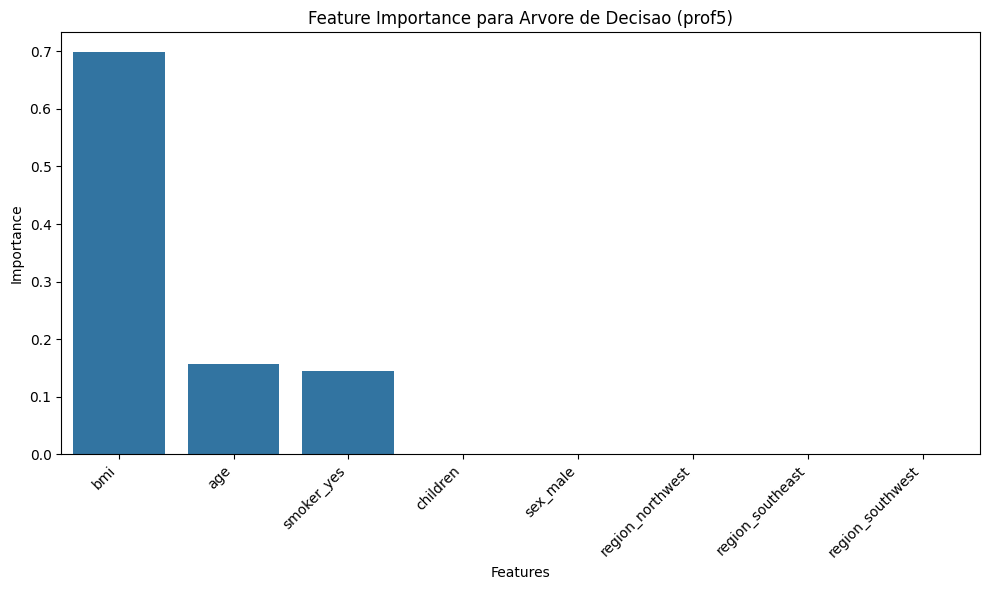


 Ultimos important features a remover : ['children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

 Arvore de Decisao com Features Importances Removidos


In [ ]:

feature_importances = modelo_prof5.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance para Arvore de Decisao (prof5)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
ultimos_important_features = sorted_feature_importances.tail(5).index.tolist()
print("\n Ultimos important features a remover :", ultimos_important_features)
X_train_reduced = X_train.drop(columns=ultimos_important_features)
X_val_reduced = X_val.drop(columns=ultimos_important_features)
modelo_final = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_final.fit(X_train_reduced, y_train)


print("\n Arvore de Decisao com Features Importances Removidos")

# **Avaliação do Novo Modelo**

Com as cinco features removidas, treine novamente o modelo de árvore de decisão escolhido, e o avalie novamente utilizando apenas o **conjunto de validação**.

In [ ]:

y_pred_reduced = modelo_final.predict(X_val_reduced)

mse_prof5 = mean_squared_error(y_val, predicao_y_prof5)
mae_prof5 = mean_absolute_error(y_val, predicao_y_prof5)
r2_prof5 = r2_score(y_val, predicao_y_prof5)

print("\nMetricas de decisão para a árvore (prof5):")
print(f"  MSE: {mse_prof5:.2f}")
print(f"  MAE: {mae_prof5:.2f}")
print(f"  R²: {r2_prof5:.2f}")


Metricas de decisão para a árvore (prof5):
  MSE: 88386547.83
  MAE: 3928.58
  R²: -3.71


# **Criação de Um Exemplo Fictício**

Agora que a árvore de decisão está treinada, selecione o melhor modelo e elabore um exemplo fictício e execute uma predição com o modelo. Para isso, crie um exemplo que pareça ter sido retirado do dataset original, ou seja, que não tenha sofrido transformação alguma, e então aplique as transformações necessárias.

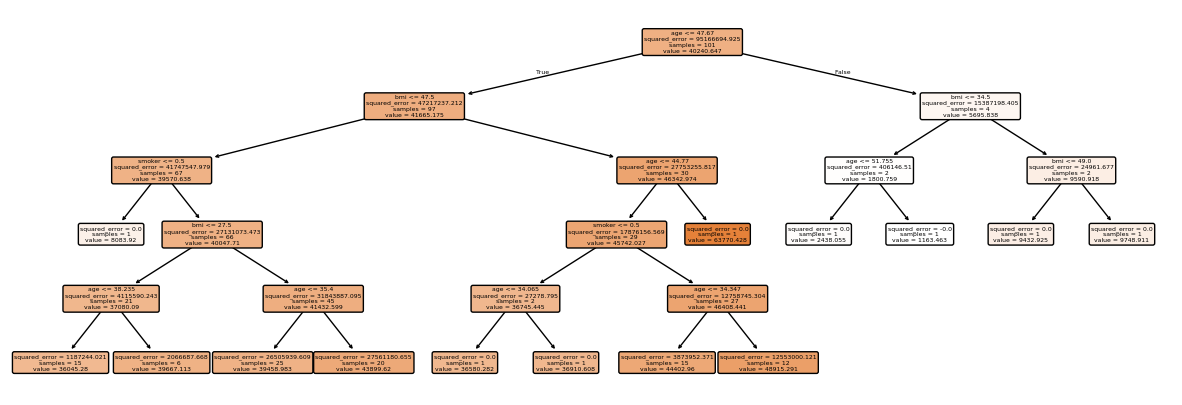

In [ ]:
feature_names = ['bmi','age','smoker']
class_names = [f"Classe {c}" for c in np.unique(y)]
plt.figure(figsize=(15,5))
plot_tree(modelo_final,
          filled=True,
          rounded=True,
          class_names=class_names,
          feature_names=feature_names,
          max_depth=5)

plt.show()

In [ ]:
med_age=df['age'].mean()
med_bmi=df['bmi'].mean()
mod_smok=df['smoker'].mode()
exemplo=pd.DataFrame({'age':[med_age],'bmi':[med_bmi],'smoker':[mod_smok]})
exemplo

,age,bmi,smoker
0,39.207025,30.663397,"0 no Name: smoker, dtype: object"


In [ ]:

new_example_data = {'age': [45], 'bmi': [25.5], 'smoker': ['no'], 'sex': ['female'], 'children': [2], 'region': ['northwest']}
new_example_df = pd.DataFrame(new_example_data)


new_example_processed = pd.get_dummies(new_example_df, columns=['sex', 'smoker', 'region'], drop_first=True)


for col in X_train_reduced.columns:
    if col not in new_example_processed.columns:
        new_example_processed[col] = 0


new_example_processed = new_example_processed[X_train_reduced.columns]


new_prediction = modelo_final.predict(new_example_processed)

print("Predição final:", new_prediction[0])

Predição final: 8083.9198


# **Treine e Teste o Modelo de KNN**

Treinar três versões diferentes do modelo K-Nearest Neighbors (KNN) utilizando valores variados para o parâmetro K.

**Dica:**
- Busque pela função `KNeighborsRegressor(n_neighbors=?)` da biblioteca `scikitlearn`

In [ ]:

modelo_knn_k3 = KNeighborsRegressor(n_neighbors=3)
modelo_knn_k5 = KNeighborsRegressor(n_neighbors=5)
modelo_knn_k10 = KNeighborsRegressor(n_neighbors=10)

modelo_knn_k3.fit(X_train, y_train)
modelo_knn_k5.fit(X_train, y_train)
modelo_knn_k10.fit(X_train, y_train)

print("Modelos knn treinados com K=3, 5, e 10.")

Modelos knn treinados com K=3, 5, e 10.


# **Avaliação do Modelo**

Neste momento, é importante avaliar cada um dos modelos gerados utilizando o **dataset de validação**. Apresente as métricas de erro quadrático médio (MSE), erro absoluto médio (MAE), e coeficiente de determinação (R²) para cada modelo.

**Dica:**

- Você pode usar a função `mean_squared_error()` da biblioteca `scikitlearn.metrics` e, para calcular as demais métricas do modelo, busque pelas funções `mean_absolute_error()` e `r2_score()`.

In [ ]:
y_pred_reduced = modelo_final.predict(X_val_reduced)
predicao_y_knn5 = modelo_knn_k5.predict(X_val)

knn_mse_5 = mean_squared_error(y_val, predicao_y_knn5)
mae_knn5 = mean_absolute_error(y_val, predicao_y_knn5)
r2_knn5 = r2_score(y_val, predicao_y_knn5)

print("\nMetricas de decisão para o knn =5 :")
print(f"  MSE: {knn_mse_5:.2f}")
print(f"  MAE: {mae_knn5:.2f}")
print(f"  R²: {r2_knn5:.2f}")

y_pred_reduced = modelo_final.predict(X_val_reduced)
predicao_y_knn3 = modelo_knn_k3.predict(X_val)

knn_mse_3 = mean_squared_error(y_val, predicao_y_knn3)
mae_knn3 = mean_absolute_error(y_val, predicao_y_knn3)
r2_knn3 = r2_score(y_val, predicao_y_knn3)

print("\nMetricas de decisão para o knn =3 :")
print(f"  MSE: {knn_mse_3:.2f}")
print(f"  MAE: {mae_knn3:.2f}")
print(f"  R²: {r2_knn3:.2f}")

y_pred_reduced = modelo_final.predict(X_val_reduced)
predicao_y_knn10 = modelo_knn_k10.predict(X_val)

knn_mse_10 = mean_squared_error(y_val, predicao_y_knn10)
mae_knn10 = mean_absolute_error(y_val, predicao_y_knn10)
r2_knn10 = r2_score(y_val, predicao_y_knn10)

print("\nMetricas de decisão para o knn =10 :")
print(f"  MSE: {knn_mse_10:.2f}")
print(f"  MAE: {mae_knn10:.2f}")
print(f"  R²: {r2_knn10:.2f}")


Metricas de decisão para o knn =5 :
  MSE: 34580239.12
  MAE: 2994.84
  R²: -0.84

Metricas de decisão para o knn =3 :
  MSE: 53600332.19
  MAE: 3189.39
  R²: -1.85

Metricas de decisão para o knn =10 :
  MSE: 18397683.95
  MAE: 2836.49
  R²: 0.02


# **Criação de Um Exemplo Fictício**

Agora que o KNN está treinado, selecione o melhor modelo e elabore um exemplo fictício, diferente do previamente criado, e execute uma predição com o modelo. Para isso, crie um exemplo que pareça ter sido retirado do dataset original, ou seja, que não tenha sofrido transformação alguma, e então aplique as transformações necessárias.

In [ ]:

new2_example_data = {'age': [55], 'bmi': [35], 'smoker': ['yes'], 'sex': ['male'], 'children': [3], 'region': ['southeast']}
new2_example_df = pd.DataFrame(new2_example_data)


new2_example_processed = pd.get_dummies(new2_example_df, columns=['sex', 'smoker', 'region'], drop_first=True)


for col in X_train.columns:
    if col not in new2_example_processed.columns:
        new2_example_processed[col] = 0


new2_example_processed = new2_example_processed[X_train.columns]


new2_prediction = modelo_knn_k5.predict(new2_example_processed)

print("Predição final:", new2_prediction[0])

Predicted charge for the new example using KNN: 47735.728214


# **Escolha do melhor modelo**

Selecione o melhor modelo até agora com base no desempenho no conjunto de validação (KNN ou a Árvore de Decisão; a avaliação determinará a escolha) e avalie-o no **conjunto de** **teste**.

In [ ]:

best_model = modelo_knn_k10
X_test_eval = X_test


y_pred_test = best_model.predict(X_test_eval)


mse_teste = mean_squared_error(y_test, y_pred_test)
mae_teste = mean_absolute_error(y_test, y_pred_test)
r2_teste = r2_score(y_test, y_pred_test)


print("metricas para o melhor modelo (KNN K=10) no conjunto teste:")
print(f"  MSE: {mse_teste:.2f}")
print(f"  MAE: {mae_teste:.2f}")
print(f"  R²: {r2_teste:.2f}")

metricas para o melhor modelo (KNN K=10) no conjunto teste:
  MSE: 51733421.98
  MAE: 4032.91
  R²: 0.09


# **Mostre uma análise comparativa das métricas entre validação e teste para o modelo escolhido**

**Observação:** Se houver uma discrepância muito grande nos resultados, algo pode estar errado, verifique seu treinamento e avaliação do modelo.

In [ ]:


print("Analise comparativa das métricas (KNN K=10):")
print("-" * 40)
print(f"{'Metrica':<10} | {'Conjunto de validação':<15} | {'Conjunto teste':<15}")
print("-" * 40)
print(f"{'MSE':<10} | {knn_mse_10:<15.2f} | {mse_test:<15.2f}")
print(f"{'MAE':<10} | {mae_knn10:<15.2f} | {mae_test:<15.2f}")
print(f"{'R²':<10} | {r2_knn10:<15.2f} | {r2_test:<15.2f}")
print("-" * 40)

Analise comparativa das métricas (KNN K=10):
----------------------------------------
Metrica    | Conjunto de validação | Conjunto teste 
----------------------------------------
MSE        | 18397683.95     | 51733421.98    
MAE        | 2836.49         | 4032.91        
R²         | 0.02            | 0.09           
----------------------------------------
